
# 6.2 Exploring Relationships
Daniel Rodelli

#### TABLE OF CONTENTS
 - Import datasets and checks
 - EDA
     - Correlation matrix
     - Key Questions
         1. Geographical distribution
                 1.1 North-South differences
                 1.2 Koppen Climatic Zonation
                 1.3 Effects of Population density
         2. Seasonal and temporal variation
         
         
         3. Further Variables to consider
                 3.1 Gender
                 3.2 Age
   
   
 - Revisiting Key Quesitons
 - Working Hypothesis

In [1]:
#iporting the libraries
import pandas as pd
import numpy as np
import os
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\daniel\Documents\CareerFoundry\Immersion_achievement6'

In [20]:
#importing the dataset
df = pd.read_csv(os.path.join(path,'data', 'prepared_data','df_checked.csv'))

In [4]:
df.head()

Unnamed: 0               State      District Age_group Gender  N_cases  \
0           0  Schleswig-Holstein  SK Flensburg   A00-A04      M        1   
1           1  Schleswig-Holstein  SK Flensburg   A00-A04      M        1   
2           2  Schleswig-Holstein  SK Flensburg   A00-A04      M        1   
3           3  Schleswig-Holstein  SK Flensburg   A00-A04      M        1   
4           4  Schleswig-Holstein  SK Flensburg   A00-A04      M        1   

   N_deaths  ObjectId  N_recoveries  Illness_onset        Date  day  month  \
0         0         1             1              0  2020-09-30   30      9   
1         0         2             1              0  2020-10-29   29     10   
2         0         3             1              0  2020-11-03    3     11   
3         0         4             1              1  2020-11-19   19     11   
4         0         5             1              1  2020-11-18   18     11   

   year  weekday     Male   Female    Total  
0  2020        2  1425649  1485226  2910875  
1  2020        3  1425649  1485226  2910875  
2  2020        1  1425649  1485226  2910875  
3  2020        3  1425649  1485226  2910875  
4  2020        2  1425649  1485226  2910875

In [5]:
df.Date.value_counts().sort_index()

2020-01-01      14
2020-01-02      14
2020-01-03      17
2020-01-04      19
2020-01-05      17
              ... 
2021-10-08    3546
2021-10-09    2656
2021-10-10    1503
2021-10-11    1985
2021-10-12    2122
Name: Date, Length: 650, dtype: int64

I am interest in the number of deaths and cases at the State level, not the district. I will therefore sum all the district information for each state using a pivot table
I will not use the values of population first, because it would end up with artificially large numbers, given the 'sum' aggregate function.
I will add again this information later. The same goes for 'year', 'month', 'day'

In [414]:
pv=df.pivot_table(index=['State','Age_group','Gender','Date'],
                   values=['N_cases', 'N_deaths', 'N_recoveries'], aggfunc='sum')

In [415]:
pv=pv.reset_index()

In [416]:
pv.head()

State Age_group Gender        Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F  2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F  2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F  2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F  2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F  2020-03-16        3         0   

   N_recoveries  
0             1  
1             3  
2             4  
3             1  
4             3

In [417]:
pv.shape

(102850, 7)

Re-importing and merging the demographics dataset

In [418]:
df_demo = pd.read_csv(os.path.join(path,'data', 'original_data','demo_DE.csv'))

In [320]:
df_demo.head()

Bundesland  m�nnlich  weiblich  Insgesamt
0  Baden-W�rttemberg   5516636   5586407   11103043
1             Bayern   6512595   6627588   13140183
2             Berlin   1802038   1862050    3664088
3        Brandenburg   1248050   1283021    2531071
4             Bremen    336390    343740     680130

In [419]:
df_demo=df_demo.rename(columns={'Bundesland':'State','m�nnlich':'Male', 'weiblich':'Female', 'Insgesamt':'Total'})
df_demo=df_demo.replace({'Baden-W�rttemberg':'Baden-Württemberg','Th�ringen':'Thüringen'})

In [324]:
df_demo.head()

State     Male   Female     Total
0  Baden-Württemberg  5516636  5586407  11103043
1             Bayern  6512595  6627588  13140183
2             Berlin  1802038  1862050   3664088
3        Brandenburg  1248050  1283021   2531071
4             Bremen   336390   343740    680130

In [420]:
df_merged=pd.merge(pv, df_demo, on=['State'])

In [421]:
df_merged.head()

State Age_group Gender        Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F  2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F  2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F  2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F  2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F  2020-03-16        3         0   

   N_recoveries     Male   Female     Total  
0             1  5516636  5586407  11103043  
1             3  5516636  5586407  11103043  
2             4  5516636  5586407  11103043  
3             1  5516636  5586407  11103043  
4             3  5516636  5586407  11103043

In [422]:
df_merged.dtypes

State           object
Age_group       object
Gender          object
Date            object
N_cases          int64
N_deaths         int64
N_recoveries     int64
Male             int64
Female           int64
Total            int64
dtype: object

In [424]:
df_merged['State']=df_merged['State'].astype('category')
df_merged['Age_group']=df_merged['Age_group'].astype('category')
df_merged['Gender']=df_merged['Gender'].astype('category')
df_merged['Date'] =  pd.to_datetime(df_merged['Date'], infer_datetime_format=True)

In [425]:
#extract the year, month, day information from 'Date'
df_merged['day'] = df_merged['Date'].dt.day
df_merged['month'] = df_merged['Date'].dt.month
df_merged['year'] = df_merged['Date'].dt.year
df_merged['weekday']= pv1['Date'].dt.dayofweek

In [426]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102850 entries, 0 to 102849
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   State         102850 non-null  category      
 1   Age_group     102850 non-null  category      
 2   Gender        102850 non-null  category      
 3   Date          102850 non-null  datetime64[ns]
 4   N_cases       102850 non-null  int64         
 5   N_deaths      102850 non-null  int64         
 6   N_recoveries  102850 non-null  int64         
 7   Male          102850 non-null  int64         
 8   Female        102850 non-null  int64         
 9   Total         102850 non-null  int64         
 10  day           102850 non-null  int64         
 11  month         102850 non-null  int64         
 12  year          102850 non-null  int64         
 13  weekday       102850 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(10)
memory usage: 9.7 MB


In [561]:
#Exporting the dataframe as .cvs
df_merged.to_csv(os.path.join(path,'data','prepared_data','pivot_state.csv'))

In [765]:
#setting the color palettes for the categories
geo_flag='rainbow_r'
age_group = 'Dark2'
gender=['green', 'orange']
climate_flag = ['b','orange', 'grey']
density_flag = ['g','orange','r']

## EDA

#### Preliminary Correlation map

In [428]:
correlation1=df_merged.corr()

In [562]:
correlation1

N_cases  N_deaths  N_recoveries      Male    Female     Total  \
N_cases       1.000000  0.206040      0.992717  0.332531  0.332241  0.332394   
N_deaths      0.206040  1.000000      0.168582  0.136155  0.135955  0.136058   
N_recoveries  0.992717  0.168582      1.000000  0.322122  0.321882  0.322010   
Male          0.332531  0.136155      0.322122  1.000000  0.999879  0.999969   
Female        0.332241  0.135955      0.321882  0.999879  1.000000  0.999971   
Total         0.332394  0.136058      0.322010  0.999969  0.999971  1.000000   
day           0.006632  0.004381      0.011136  0.000567  0.000572  0.000569   
month         0.053017  0.020016      0.040352  0.000043 -0.000006  0.000018   
year          0.033268 -0.047666      0.024083 -0.044360 -0.044122 -0.044241   
weekday      -0.036554 -0.026679     -0.034962  0.003437  0.003420  0.003428   

                   day     month      year   weekday  
N_cases       0.006632  0.053017  0.033268 -0.036554  
N_deaths      0.004381  0.020016 -0.047666 -0.026679  
N_recoveries  0.011136  0.040352  0.024083 -0.034962  
Male          0.000567  0.000043 -0.044360  0.003437  
Female        0.000572 -0.000006 -0.044122  0.003420  
Total         0.000569  0.000018 -0.044241  0.003428  
day           1.000000 -0.015990 -0.047769 -0.000356  
month        -0.015990  1.000000 -0.450605 -0.010992  
year         -0.047769 -0.450605  1.000000  0.007017  
weekday      -0.000356 -0.010992  0.007017  1.000000

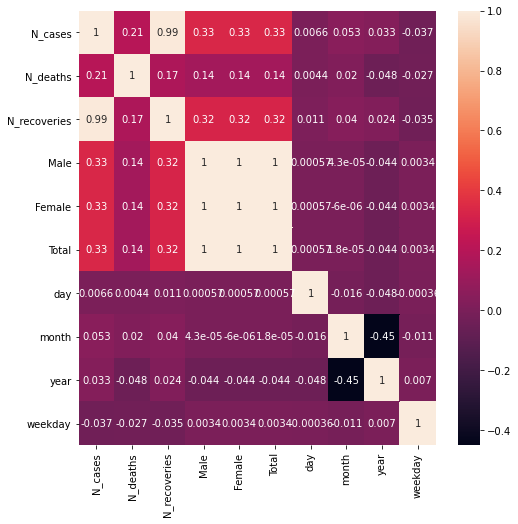

In [429]:
g=plt.figure(figsize=(8, 8))
sns.heatmap(correlation1, annot=True)
plt.show()

##### Insights: 
 - the number of cases and the number fo recoveries are the only variables with high correlation.
 - there is no need to keep separate columns for the number of male and female inhabitants.
 - the correlation between cases or deaths and population size is very weak,
     
     -another metric relative to the population would be useful, such as population density (higher density means that the virus can spread more easily)

________________________________________________

## Key questions
 - ### Geographical
       Does the different climate in different States play a role in the diffusion of COVID-19?
       
- ### Temporal
       - What is the seasonality of COVID-19?
       - How the number of cases and deaths vary along the year, month, and week?
       - What is the average time lag between a spike in cases and the respective spike in deaths/recoveries?
     

###  1. Geographical

#### 1.1 North-South Differences
I will first devide the State into North-Central-South based on their geographical position. The assumption is that Northern States, with a colder climate, will be affected differently by COVID-19 than Southern States

In [430]:
geography_dic= {'Niedersachsen':'north','Bremen':'north', 'Hamburg':'north','Schleswig-Holstein':'north',
                'Mecklenburg-Vorpommern':'north', 'Saarland':'central','Hessen':'central','Rheinland-Pfalz':'central',
                'Thüringen':'central', 'Sachsen':'central','Sachsen-Anhalt':'central','Brandenburg':'central',
                'Berlin':'central','Nordrhein-Westfalen':'central','Bayern':'south', 'Baden-Württemberg':'south'}

In [431]:
geography_dic

{'Niedersachsen': 'north',
 'Bremen': 'north',
 'Hamburg': 'north',
 'Schleswig-Holstein': 'north',
 'Mecklenburg-Vorpommern': 'north',
 'Saarland': 'central',
 'Hessen': 'central',
 'Rheinland-Pfalz': 'central',
 'Thüringen': 'central',
 'Sachsen': 'central',
 'Sachsen-Anhalt': 'central',
 'Brandenburg': 'central',
 'Berlin': 'central',
 'Nordrhein-Westfalen': 'central',
 'Bayern': 'south',
 'Baden-Württemberg': 'south'}

In [432]:
df_merged['geo_flag']=df_merged['State'].map(geography_dic)

In [433]:
df_merged.head()

State Age_group Gender       Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F 2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F 2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F 2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F 2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F 2020-03-16        3         0   

   N_recoveries     Male   Female     Total  day  month  year  weekday  \
0             1  5516636  5586407  11103043    2      3  2020        0   
1             3  5516636  5586407  11103043   13      3  2020        4   
2             4  5516636  5586407  11103043   14      3  2020        5   
3             1  5516636  5586407  11103043   15      3  2020        6   
4             3  5516636  5586407  11103043   16      3  2020        0   

  geo_flag  
0    south  
1    south  
2    south  
3    south  
4    south

Text(0.5, 1.0, 'Number of cases by month by Geographical Position')

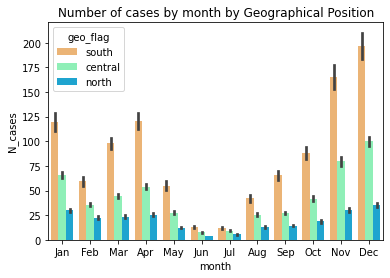

In [749]:
f=sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_cases'], hue='geo_flag', palette=geo_flag)
f.set_xticklabels(['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=10)
f.set_title('Number of cases by month by Geographical Position')

In [440]:
pv_geo_month=df_merged.pivot_table(index=['geo_flag', 'month', 'Age_group'], values=['N_deaths', 'N_cases', 'N_recoveries'], 
                          aggfunc='sum')

In [441]:
pv_geo_month=pv_geo_month.reset_index()
pv_geo_month

geo_flag  month Age_group  N_cases  N_deaths  N_recoveries
0    central      1   A00-A04     3931         1          3930
1    central      1   A05-A14    10010         0         10010
2    central      1   A15-A34    64957        10         64947
3    central      1   A35-A59    96661       312         96349
4    central      1   A60-A79    46798      3092         43706
..       ...    ...       ...      ...       ...           ...
247    south     12   A15-A34    56982         4         56978
248    south     12   A35-A59    77727       189         77538
249    south     12   A60-A79    32357      1695         30662
250    south     12      A80+    22940      5134         17806
251    south     12   unknown       42         0            42

[252 rows x 6 columns]

<AxesSubplot:xlabel='N_cases', ylabel='N_deaths'>

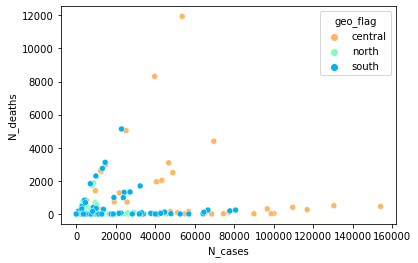

In [478]:
sns.scatterplot(data=pv_geo_month, x='N_cases', y='N_deaths', hue='geo_flag', palette=geo_flag)

##### Insights
There is no much information that can be readly seen in these charts, because different regions have different number of inhabitants.
It is worth to try to normalize the number of cases/recoveries/deaths per number of inhabitants.

In [491]:
df_merged['N_cases/100k']=df_merged['N_cases']/(df_merged['Total']/100000)
df_merged['N_deaths/100k']=df_merged['N_deaths']/(df_merged['Total']/100000)
df_merged['N_recoveries/100k']=df_merged['N_recoveries']/(df_merged['Total']/100000)

In [492]:
df_merged.head()

State Age_group Gender       Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F 2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F 2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F 2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F 2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F 2020-03-16        3         0   

   N_recoveries     Male   Female     Total  day  month  year  weekday  \
0             1  5516636  5586407  11103043    2      3  2020        0   
1             3  5516636  5586407  11103043   13      3  2020        4   
2             4  5516636  5586407  11103043   14      3  2020        5   
3             1  5516636  5586407  11103043   15      3  2020        6   
4             3  5516636  5586407  11103043   16      3  2020        0   

  geo_flag  N_cases/100k  N_cases/1M  N_deaths/100k  N_recoveries/100k  
0    south      0.009007    0.090065            0.0           0.009007  
1    south      0.027020    0.270196            0.0           0.027020  
2    south      0.036026    0.360262            0.0           0.036026  
3    south      0.009007    0.090065            0.0           0.009007  
4    south      0.027020    0.270196            0.0           0.027020

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

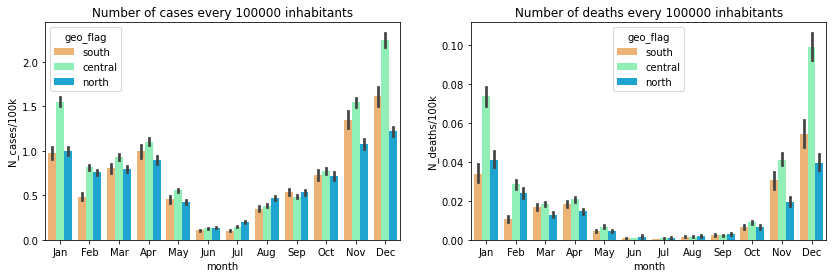

In [843]:
f=plt.figure(1, figsize=(14, 4))

ax=f.add_subplot(121)             
g=sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_cases/100k'], hue='geo_flag', palette=geo_flag, ax=ax)
ax.set_title('Number of cases every 100000 inhabitants')
g.set_xticklabels(['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=10)

ax1=f.add_subplot(122)
g=sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_deaths/100k'], hue='geo_flag', palette=geo_flag, ax=ax1)
ax1.set_title('Number of deaths every 100000 inhabitants')
g.set_xticklabels(['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=10)



In [844]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_deaths_100k_geography.png'))

Now the differences between geographical areas are clearer.
 - The central region have more cases and deaths along the whole year than the other two regions
 - The northern region has less cases and deaths than the south region, despite the assumpion that a colder climate would favor the spread of COVID-19
 
 Two explanations:
  1. Climate in Germany in not strictly a gradient of north-south, but more complex.
  2. Other factors have a higher weight in the spread of COVID-19, such as population density.
  
  I will takle the two possibilities.

#### 1.2 Climatic zonation effects
The climatic zonation of Germany, according to the Koppen climatic zones, is East-West, not North-South. Western Germany is classified as 'Temperate Oceanic Climate', while the East is classified as 'Temperate Continental Climate'.
 - Temperate Oceanic Climate: Temperate, no dry season, warm summer;
 - Temperate Continental Climate: Cold, no dry season, warm summer.
 
I will create another flag in the dataframe for this categorization.

In [507]:
climate_dic= {'Niedersachsen':'oceanic','Bremen':'oceanic', 'Hamburg':'oceanic','Schleswig-Holstein':'oceanic',
                'Mecklenburg-Vorpommern':'continental', 'Saarland':'oceanic','Hessen':'continental','Rheinland-Pfalz':'oceanic',
                'Thüringen':'continental', 'Sachsen':'continental','Sachsen-Anhalt':'continental','Brandenburg':'continental',
                'Berlin':'continental','Nordrhein-Westfalen':'oceanic','Bayern':'continental', 'Baden-Württemberg':'oceanic'}

In [508]:
df_merged['climate_flag'] = df_merged['State'].map(climate_dic)

In [509]:
df_merged.head()

State Age_group Gender       Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F 2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F 2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F 2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F 2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F 2020-03-16        3         0   

   N_recoveries     Male   Female     Total  ...  month  year  weekday  \
0             1  5516636  5586407  11103043  ...      3  2020        0   
1             3  5516636  5586407  11103043  ...      3  2020        4   
2             4  5516636  5586407  11103043  ...      3  2020        5   
3             1  5516636  5586407  11103043  ...      3  2020        6   
4             3  5516636  5586407  11103043  ...      3  2020        0   

   geo_flag N_cases/100k  N_cases/1M  N_deaths/100k  N_recoveries/100k  \
0     south     0.009007    0.090065            0.0           0.009007   
1     south     0.027020    0.270196            0.0           0.027020   
2     south     0.036026    0.360262            0.0           0.036026   
3     south     0.009007    0.090065            0.0           0.009007   
4     south     0.027020    0.270196            0.0           0.027020   

   deaths_diff  climate_flag  
0          NaN       oceanic  
1          NaN       oceanic  
2          NaN       oceanic  
3          NaN       oceanic  
4          NaN       oceanic  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Number of deaths every 100000 inhabitants')

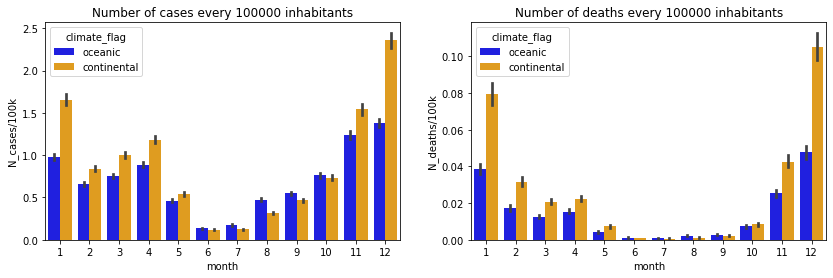

In [755]:
f=plt.figure(1, figsize=(14, 4))

ax=f.add_subplot(121)             
g=sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_cases/100k'], hue='climate_flag', palette=
            climate_flag, ax=ax)
ax.set_title('Number of cases every 100000 inhabitants')

ax1=f.add_subplot(122)
g=sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_deaths/100k'], hue='climate_flag', 
            palette=climate_flag, ax=ax1)
ax1.set_title('Number of deaths every 100000 inhabitants')

In [758]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_deaths_100k_climate.png'))

##### Insights
States that have a continental climate (colder, no dry season, warm summer) have generally more cases and always more deaths related to COVID-19

#### 1.3 Effects of Population Density

In [524]:
density_dic={'Baden-Württemberg': 308,
 'Bayern': 184,
 'Berlin': 4055,
 'Brandenburg': 84,
 'Bremen': 1624,
 'Hamburg': 2424,
 'Hessen': 296,
 'Mecklenburg-Vorpommern': 69,
 'Niedersachsen': 167,
 'Nordrhein-Westfalen': 525,
 'Rheinland-Pfalz': 205,
 'Saarland': 387,
 'Sachsen': 221,
 'Sachsen-Anhalt': 109,
 'Schleswig-Holstein': 183,
 'Thüringen': 133}

In [525]:
df_merged['density'] = df_merged['State'].map(density_dic)

In [526]:
df_merged.head()

State Age_group Gender       Date  N_cases  N_deaths  \
0  Baden-Württemberg   A00-A04      F 2020-03-02        1         0   
1  Baden-Württemberg   A00-A04      F 2020-03-13        3         0   
2  Baden-Württemberg   A00-A04      F 2020-03-14        4         0   
3  Baden-Württemberg   A00-A04      F 2020-03-15        1         0   
4  Baden-Württemberg   A00-A04      F 2020-03-16        3         0   

   N_recoveries     Male   Female     Total  ...  year  weekday  geo_flag  \
0             1  5516636  5586407  11103043  ...  2020        0     south   
1             3  5516636  5586407  11103043  ...  2020        4     south   
2             4  5516636  5586407  11103043  ...  2020        5     south   
3             1  5516636  5586407  11103043  ...  2020        6     south   
4             3  5516636  5586407  11103043  ...  2020        0     south   

   N_cases/100k N_cases/1M  N_deaths/100k  N_recoveries/100k  deaths_diff  \
0      0.009007   0.090065            0.0           0.009007          NaN   
1      0.027020   0.270196            0.0           0.027020          NaN   
2      0.036026   0.360262            0.0           0.036026          NaN   
3      0.009007   0.090065            0.0           0.009007          NaN   
4      0.027020   0.270196            0.0           0.027020          NaN   

   climate_flag  density  
0       oceanic      308  
1       oceanic      308  
2       oceanic      308  
3       oceanic      308  
4       oceanic      308  

[5 rows x 22 columns]

In [527]:
df_merged.dtypes

State                      category
Age_group                  category
Gender                     category
Date                 datetime64[ns]
N_cases                       int64
N_deaths                      int64
N_recoveries                  int64
Male                          int64
Female                        int64
Total                         int64
day                           int64
month                         int64
year                          int64
weekday                       int64
geo_flag                     object
N_cases/100k                float64
N_cases/1M                  float64
N_deaths/100k               float64
N_recoveries/100k           float64
deaths_diff                 float64
climate_flag                 object
density                    category
dtype: object

In [528]:
df_merged['density']=df_merged['density'].astype('int16')

In [540]:
df_merged['density'].value_counts().sort_index()

69      4502
84      5347
109     5328
133     5498
167     7590
183     5741
184     8537
205     7178
221     5718
296     7607
308     7828
387     5014
525     8962
1624    4760
2424    6115
4055    7125
Name: density, dtype: int64

In [544]:
density_flag=[]
for i in df_merged['density']:
    if (i <= 200):
        density_flag.append('low_density')
    elif (i > 200) and (i <= 1000):
        density_flag.append('mid_density')
    else:
        density_flag.append('high_density')
        
df_merged['density_flag']=density_flag
df_merged['density_flag']=df_merged['density_flag'].astype('category')

In [545]:
df_merged['density_flag'].value_counts()

low_density     42543
mid_density     42307
high_density    18000
Name: density_flag, dtype: int64

In [536]:
df_merged['cases/density'] = df_merged['N_cases']/df_merged['density']
df_merged['deaths/density'] = df_merged['N_deaths']/df_merged['density']
df_merged['recoveries/density'] = df_merged['N_recoveries']/df_merged['density']

(0.0, 3.0)

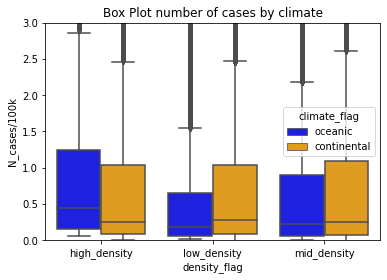

In [841]:
g=sns.boxplot(data=df_merged, x='density_flag', y='N_cases/100k', hue='climate_flag', palette=climate_flag)
g.set_title('Box Plot number of cases by climate')
plt.ylim(0,3) #limit y axis to avoid a very long vertival tain the the data

In [842]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_100k_density_climate.png'))

Text(0.5, 1.0, 'Number of deaths/population density by Climate zone')

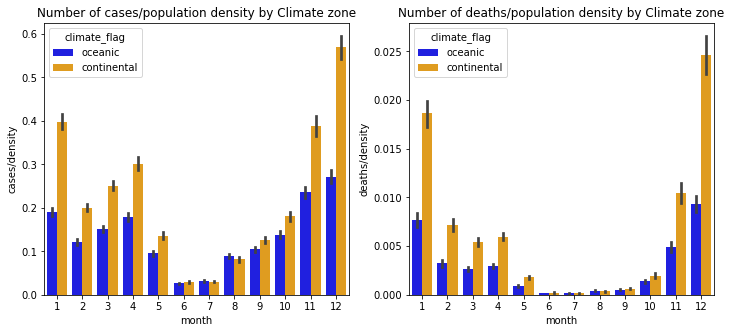

In [838]:
f=plt.figure(1,figsize=(12,5))

ax1=f.add_subplot(121)
g=sns.barplot(data=df_merged, x='month', y='cases/density', hue='climate_flag', palette=climate_flag, ax=ax1)
ax1.set_title('Number of cases/population density by Climate zone')

ax2=f.add_subplot(122)
g=sns.barplot(data=df_merged, x='month', y='deaths/density', hue='climate_flag', palette=climate_flag, ax=ax2)
ax2.set_title('Number of deaths/population density by Climate zone')

In [839]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_density_climate.png'))

Text(0.5, 1.0, 'Number of deaths every 100000 inhabitants')

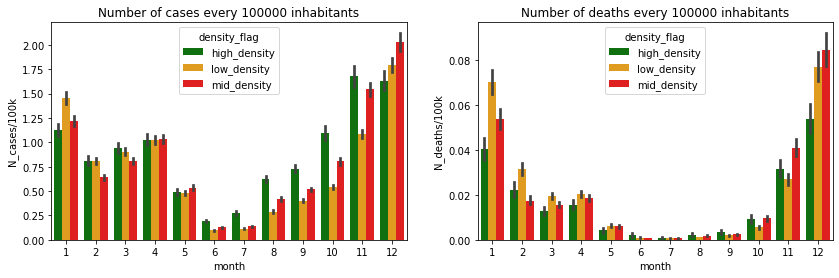

In [548]:
f=plt.figure(1, figsize=(14, 4))

ax=f.add_subplot(121)             
sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_cases/100k'], hue='density_flag', palette=
            density_flag, ax=ax)
ax.set_title('Number of cases every 100000 inhabitants')

ax1=f.add_subplot(122)
sns.barplot(data=df_merged, x=df_merged['month'], y=df_merged['N_deaths/100k'], hue='density_flag', 
            palette=density_flag, ax=ax1)
ax1.set_title('Number of deaths every 100000 inhabitants')

##### Insights  -  Climatic Zones and population density
States with continental climate have more cases and more deaths by density than oceanic climate states. 
There is clearly a relationship between climate and spread of COVID-19.

##### Insights - Population Density
High density states have generally more cases, but generally less deaths.
More deaths happen in low to mid density states.

### 2 Seasonal and Temporal variations

Text(0.5, 1.0, 'Number of cases by month')

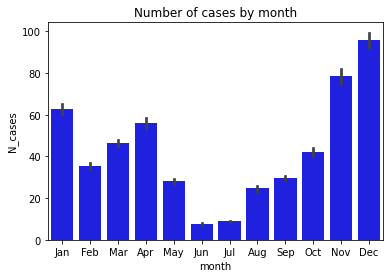

In [746]:
f=sns.barplot(data=df_merged, x='month', y='N_cases', color='b')
f.set_xticklabels(['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=10)
f.set_title('Number of cases by month')

Text(0.5, 1.0, 'Number of cases by month')

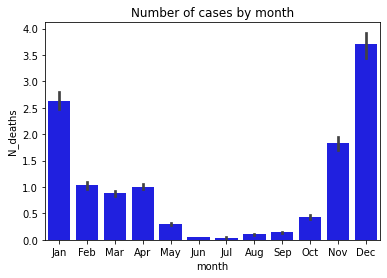

In [781]:
f=sns.barplot(data=df_merged, x='month', y='N_deaths', color='b')
f.set_xticklabels(['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=10)
f.set_title('Number of cases by month')

There is a great deal of variability in number of cases and deaths along the year, with winter months having much higher numbers than summer months, as should be expected.

Text(0.5, 1.0, 'Number of cases by day of the month')

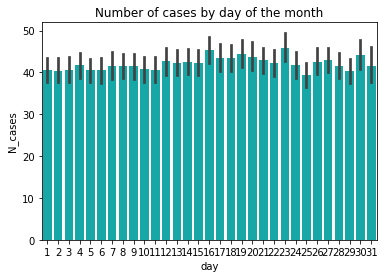

In [748]:
f=sns.barplot(data=df_merged, x='day', y='N_cases', color='c')
f.set_title('Number of cases by day of the month')

Text(0.5, 1.0, 'Number of cases by day of the month')

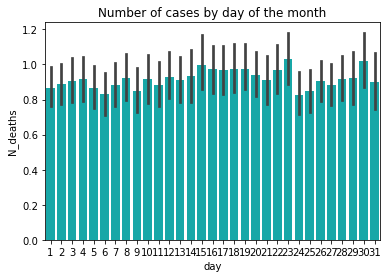

In [782]:
f=sns.barplot(data=df_merged, x='day', y='N_deaths', color='c')
f.set_title('Number of cases by day of the month')

There is no significant varation in number of casesor deaths along the days of a month.

Text(0.5, 1.0, 'Number of cases by weekday')

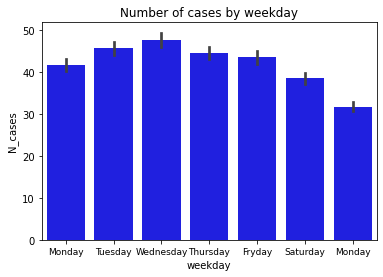

In [743]:
f=sns.barplot(data=df_merged, x='weekday', y='N_cases', color='b')
f.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fryday', 'Saturday','Monday'], size=9)
f.set_title('Number of cases by weekday')

Text(0.5, 1.0, 'Number of cases by weekday')

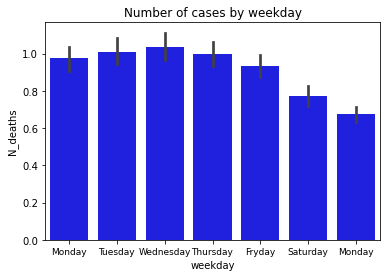

In [783]:
f=sns.barplot(data=df_merged, x='weekday', y='N_deaths', color='b')
f.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fryday', 'Saturday','Monday'], size=9)
f.set_title('Number of cases by weekday')

The number of cases and deaths are lower during the weekend. One explanation could be that there are less healthcare workers working on weekends, therefore less data can be collected or processed.

<ipython-input-744-0bfda51f78cd>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(['0','Feb.', 'Abril', 'June', 'Aug.', 'Oct.', 'Dec.'])


Text(0.5, 1.0, 'Number of cases by month')

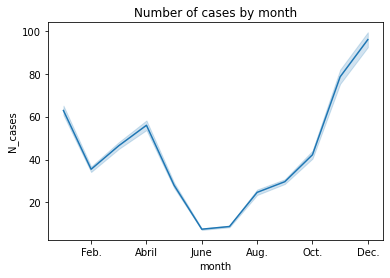

In [744]:
f=sns.lineplot(data=df_merged, x='month', y='N_cases')
f.set_xticklabels(['0','Feb.', 'Abril', 'June', 'Aug.', 'Oct.', 'Dec.'])
f.set_title('Number of cases by month')
#sns.lineplot(data=df_merged, x='month', y='N_deaths', color='r')

<ipython-input-742-d4fe12b276ae>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(['0','Feb.', 'Abril', 'June', 'Aug.', 'Oct.', 'Dec.'])


Text(0.5, 1.0, 'Number of Deaths by Month')

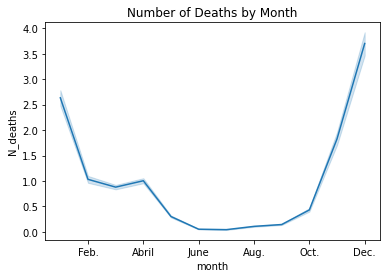

In [742]:
f=sns.lineplot(data=df_merged, x='month', y='N_deaths')
f.set_xticklabels(['0','Feb.', 'Abril', 'June', 'Aug.', 'Oct.', 'Dec.'])
f.set_title('Number of Deaths by Month')

In [ ]:
pv_DE=df_merged.pivot_table(index=['Date'], 
                            values=['N_cases', 'N_deaths','N_recoveries'], aggfunc='sum')
pv_DE=pv_DE.reset_index()
pv_DE

In [640]:
pv_DE.shape

(3900, 6)

Text(0.5, 1.0, 'Evolution of the number of cases')

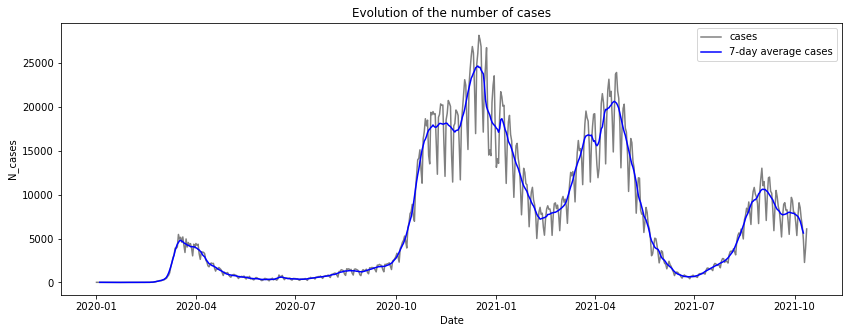

In [967]:
f=plt.figure(figsize=(14, 5))
a=sns.lineplot(data=pv_DE, x='Date', y='N_cases', color='grey', label='cases')
sns.lineplot(data=pv_DE, x='Date', y=pv_DE['N_cases'].rolling(7).mean().shift(-3), color='b', label='7-day average cases')
a.set_title('Evolution of the number of cases')

Text(0.5, 1.0, 'Evolution of the number of deaths')

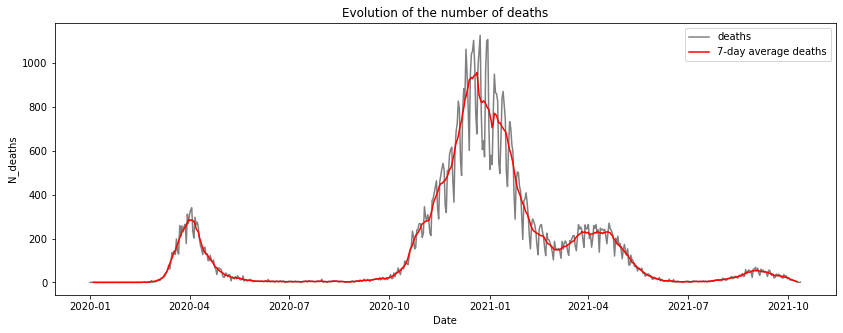

In [968]:
f=plt.figure(figsize=(14, 5))
a=sns.lineplot(data=pv_DE, x='Date', y='N_deaths', color='grey', label='deaths')
sns.lineplot(data=pv_DE, x='Date', y=pv_DE['N_deaths'].rolling(7).mean().shift(-3), color='r', label='7-day average deaths')
a.set_title('Evolution of the number of deaths')

In [643]:
pv_DE['cases_MA']=pv_DE['N_cases'].rolling(7).mean().shift(-3)
pv_DE['deaths_MA']=pv_DE['N_deaths'].rolling(7).mean().shift(-3)

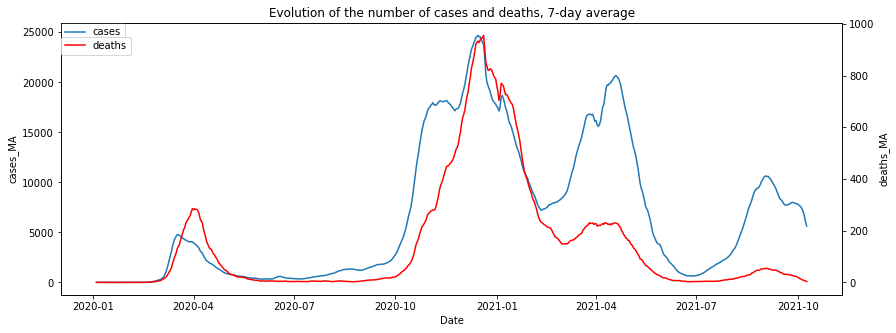

In [969]:
f=plt.figure(figsize=(14, 5))
ax1=plt.subplot(111)
a=sns.lineplot(data=pv_DE, x='Date', y='cases_MA', ax=ax1, label='cases')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
ax2=ax1.twinx()
sns.lineplot(data=pv_DE, x='Date', y='deaths_MA', ax=ax2, color='r', label='deaths')
plt.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=0)
a.set_title('Evolution of the number of cases and deaths, 7-day average')
ax.figure.legend()
plt.show()

In [832]:
a.figure.savefig(os.path.join(path, 'analysis','visualizations', 'time_deaths_cases.png'))

In [686]:
pv_DE_climate=df_merged.pivot_table(index=['Date', 'climate_flag'], 
                                    values=['N_cases', 'N_deaths', 'N_recoveries', 'N_cases/100k', 'N_deaths/100k'], 
                                    aggfunc='sum')

pv_DE_climate=pv_DE_climate.reset_index()

pv_DE_climate.head(10)

Date climate_flag  N_cases  N_cases/100k  N_deaths  N_deaths/100k  \
0 2020-01-01  continental        7      0.208597         0       0.000000   
1 2020-01-01      oceanic        8      0.185467         0       0.000000   
2 2020-01-02  continental        7      0.220189         0       0.000000   
3 2020-01-02      oceanic        7      0.134243         0       0.000000   
4 2020-01-03  continental        6      0.160344         0       0.000000   
5 2020-01-03      oceanic       11      0.232930         1       0.005579   
6 2020-01-04  continental        9      0.175053         1       0.024649   
7 2020-01-04      oceanic       10      0.295711         0       0.000000   
8 2020-01-05  continental        3      0.047671         0       0.000000   
9 2020-01-05      oceanic       15      0.333948         0       0.000000   

   N_recoveries  
0             7  
1             8  
2             7  
3             7  
4             6  
5            10  
6             8  
7            10  
8             3  
9            15

In [690]:
pv_DE_climate['cases_MA_cont']=pv_DE_climate[pv_DE_climate['climate_flag']=='continental']['N_cases/100k'].rolling(7).mean().shift(-3)
pv_DE_climate['cases_MA_ocean']=pv_DE_climate[pv_DE_climate['climate_flag']=='oceanic']['N_cases/100k'].rolling(7).mean().shift(-3)

pv_DE_climate['deaths_MA_cont']=pv_DE_climate[pv_DE_climate['climate_flag']=='continental']['N_deaths/100k'].rolling(7).mean().shift(-3)
pv_DE_climate['deaths_MA_ocean']=pv_DE_climate[pv_DE_climate['climate_flag']=='oceanic']['N_deaths/100k'].rolling(7).mean().shift(-3)

In [691]:
pv_DE_climate.head(10)

Date climate_flag  N_cases  N_cases/100k  N_deaths  N_deaths/100k  \
0 2020-01-01  continental        7      0.208597         0       0.000000   
1 2020-01-01      oceanic        8      0.185467         0       0.000000   
2 2020-01-02  continental        7      0.220189         0       0.000000   
3 2020-01-02      oceanic        7      0.134243         0       0.000000   
4 2020-01-03  continental        6      0.160344         0       0.000000   
5 2020-01-03      oceanic       11      0.232930         1       0.005579   
6 2020-01-04  continental        9      0.175053         1       0.024649   
7 2020-01-04      oceanic       10      0.295711         0       0.000000   
8 2020-01-05  continental        3      0.047671         0       0.000000   
9 2020-01-05      oceanic       15      0.333948         0       0.000000   

   N_recoveries  cases_MA_cont  cases_MA_ocean  deaths_MA_cont  \
0             7            NaN             NaN             NaN   
1             8            NaN             NaN             NaN   
2             7            NaN             NaN             NaN   
3             7            NaN             NaN             NaN   
4             6            NaN             NaN             NaN   
5            10            NaN             NaN             NaN   
6             8       0.142832             NaN        0.003521   
7            10            NaN        0.212160             NaN   
8             3       0.115303             NaN        0.003521   
9            15            NaN        0.219412             NaN   

   deaths_MA_ocean  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7         0.000797  
8              NaN  
9         0.000797

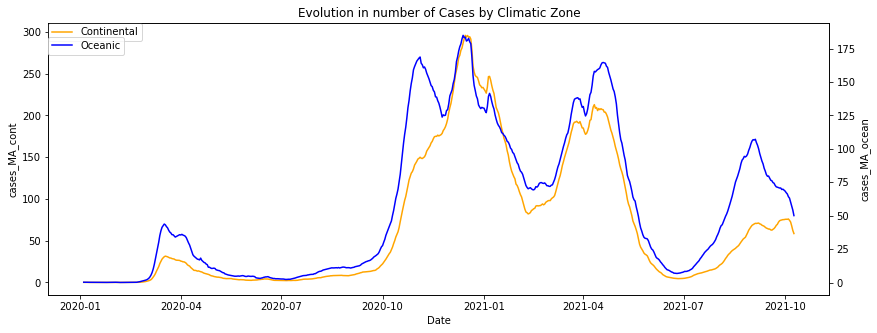

In [819]:
f=plt.figure(figsize=(14, 5))
ax1=plt.subplot(111)
a=sns.lineplot(data=pv_DE_climate, x='Date', y='cases_MA_cont', ax=ax1, color='orange', label='Continental')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
ax2=ax1.twinx()
sns.lineplot(data=pv_DE_climate, x='Date', y='cases_MA_ocean', ax=ax2, color='b', label='Oceanic')
plt.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=0)
ax.figure.legend()
a.set_title('Evolution in number of Cases by Climatic Zone')
plt.show()

In [822]:
a.figure.savefig(os.path.join(path, 'analysis','visualizations', 'casesMA_climate.png'))

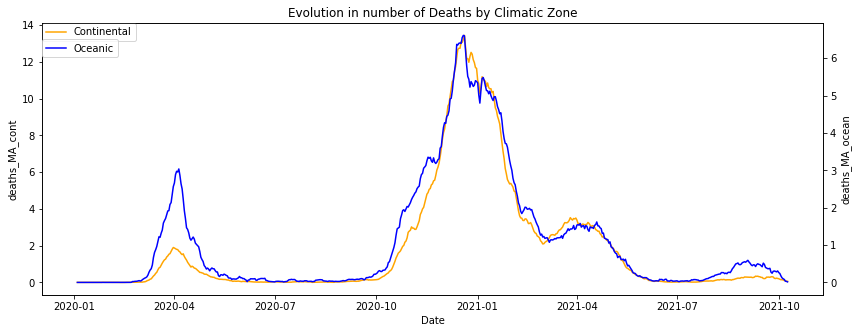

In [834]:
f=plt.figure(figsize=(14, 5))
ax1=plt.subplot(111)
a=sns.lineplot(data=pv_DE_climate, x='Date', y='deaths_MA_cont', ax=ax1, color='orange', label='Continental')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
ax2=ax1.twinx()
sns.lineplot(data=pv_DE_climate, x='Date', y='deaths_MA_ocean', ax=ax2, color='b', label='Oceanic')
plt.legend(bbox_to_anchor=(0, 0.94), loc='upper left', borderaxespad=0)
ax.figure.legend()
a.set_title('Evolution in number of Deaths by Climatic Zone')
plt.show()

In [825]:
a.figure.savefig(os.path.join(path, 'analysis','visualizations', 'deathsMA_climate.png'))

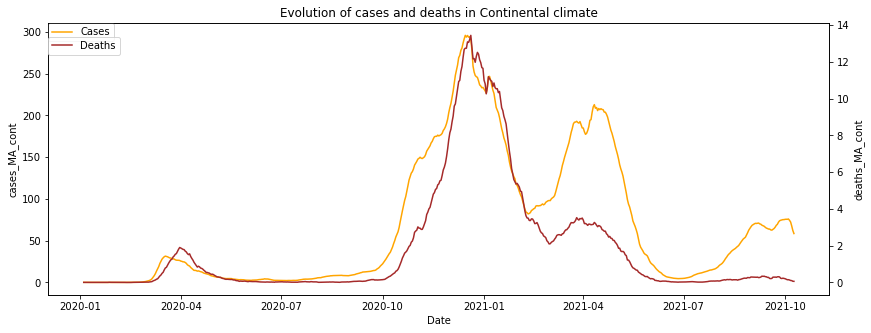

In [826]:
f=plt.figure(figsize=(14, 5))
ax1=plt.subplot(111)
a=sns.lineplot(data=pv_DE_climate, x='Date', y='cases_MA_cont', ax=ax1, color='orange', label='Cases')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
ax2=ax1.twinx()
sns.lineplot(data=pv_DE_climate, x='Date', y='deaths_MA_cont', ax=ax2, color='brown', label='Deaths')
plt.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=0)
ax.figure.legend()
a.set_title('Evolution of cases and deaths in Continental climate')
plt.show()


In [827]:
a.figure.savefig(os.path.join(path, 'analysis','visualizations', 'time_continental.png'))

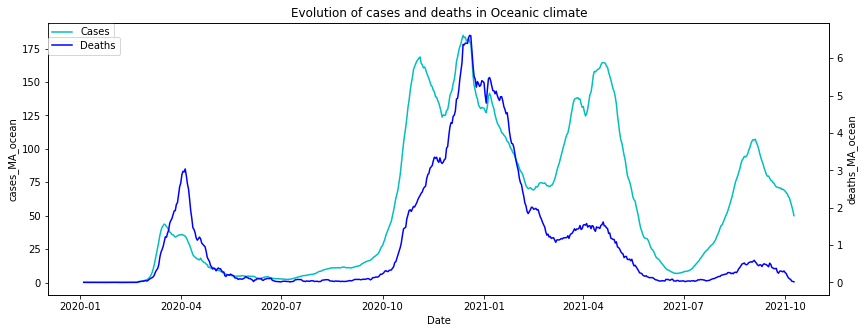

In [828]:
f=plt.figure(figsize=(14, 5))
ax1=plt.subplot(111)
a=sns.lineplot(data=pv_DE_climate, x='Date', y='cases_MA_ocean', ax=ax1, color='c', label='Cases')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0)
ax2=ax1.twinx()
b=sns.lineplot(data=pv_DE_climate, x='Date', y='deaths_MA_ocean', ax=ax2, color='b', label='Deaths')
ax.figure.legend()
plt.legend(bbox_to_anchor=(0, 0.95), loc='upper left', borderaxespad=0)
a.set_title('Evolution of cases and deaths in Oceanic climate')
plt.show()

In [829]:
a.figure.savefig(os.path.join(path, 'analysis','visualizations', 'time_oceanic.png'))

In [629]:
corr1=df_merged.corr()
corr1

N_cases  N_deaths  N_recoveries      Male    Female  \
N_cases             1.000000  0.206040      0.992717  0.332531  0.332241   
N_deaths            0.206040  1.000000      0.168582  0.136155  0.135955   
N_recoveries        0.992717  0.168582      1.000000  0.322122  0.321882   
Male                0.332531  0.136155      0.322122  1.000000  0.999879   
Female              0.332241  0.135955      0.321882  0.999879  1.000000   
Total               0.332394  0.136058      0.322010  0.999969  0.999971   
day                 0.006632  0.004381      0.011136  0.000567  0.000572   
month               0.053017  0.020016      0.040352  0.000043 -0.000006   
year                0.033268 -0.047666      0.024083 -0.044360 -0.044122   
weekday            -0.036554 -0.026679     -0.034962  0.003437  0.003420   
N_cases/100k        0.674199  0.161649      0.670720 -0.086649 -0.086584   
N_cases/1M          0.674199  0.161649      0.670720 -0.086649 -0.086584   
N_deaths/100k       0.106894  0.743118      0.079540 -0.056357 -0.056286   
N_recoveries/100k   0.671304  0.123551      0.679590 -0.081129 -0.081051   
density            -0.068485 -0.049442     -0.065799 -0.209094 -0.206161   
cases/density       0.855701  0.197519      0.847735  0.209288  0.206778   
deaths/density      0.160308  0.877469      0.127471  0.059493  0.058496   
recoveries/density  0.850773  0.159489      0.857179  0.203132  0.200735   

                       Total       day     month      year   weekday  \
N_cases             0.332394  0.006632  0.053017  0.033268 -0.036554   
N_deaths            0.136058  0.004381  0.020016 -0.047666 -0.026679   
N_recoveries        0.322010  0.011136  0.040352  0.024083 -0.034962   
Male                0.999969  0.000567  0.000043 -0.044360  0.003437   
Female              0.999971  0.000572 -0.000006 -0.044122  0.003420   
Total               1.000000  0.000569  0.000018 -0.044241  0.003428   
day                 0.000569  1.000000 -0.015990 -0.047769 -0.000356   
month               0.000018 -0.015990  1.000000 -0.450605 -0.010992   
year               -0.044241 -0.047769 -0.450605  1.000000  0.007017   
weekday             0.003428 -0.000356 -0.010992  0.007017  1.000000   
N_cases/100k       -0.086618  0.006427  0.049042  0.062400 -0.051537   
N_cases/1M         -0.086618  0.006427  0.049042  0.062400 -0.051537   
N_deaths/100k      -0.056323  0.003413  0.008132 -0.034040 -0.030046   
N_recoveries/100k  -0.081092  0.012339  0.031382  0.048526 -0.049139   
density            -0.207613 -0.000174  0.014361 -0.015037 -0.004780   
cases/density       0.208021  0.006195  0.033267  0.046552 -0.035697   
deaths/density      0.058989  0.004765  0.005511 -0.033396 -0.025686   
recoveries/density  0.201922  0.011340  0.020628  0.037020 -0.034296   

                    N_cases/100k  N_cases/1M  N_deaths/100k  \
N_cases                 0.674199    0.674199       0.106894   
N_deaths                0.161649    0.161649       0.743118   
N_recoveries            0.670720    0.670720       0.079540   
Male                   -0.086649   -0.086649      -0.056357   
Female                 -0.086584   -0.086584      -0.056286   
Total                  -0.086618   -0.086618      -0.056323   
day                     0.006427    0.006427       0.003413   
month                   0.049042    0.049042       0.008132   
year                    0.062400    0.062400      -0.034040   
weekday                -0.051537   -0.051537      -0.030046   
N_cases/100k            1.000000    1.000000       0.227927   
N_cases/1M              1.000000    1.000000       0.227927   
N_deaths/100k           0.227927    0.227927       1.000000   
N_recoveries/100k       0.990877    0.990877       0.175661   
density                 0.019944    0.019944      -0.026883   
cases/density           0.712605    0.712605       0.153852   
deaths/density          0.182475    0.182475       0.814260   
recoveries/density      0.709791    0.709791       0.118640   

         

For completeness, I include a new correlation heatmap, with all the new derived columns.

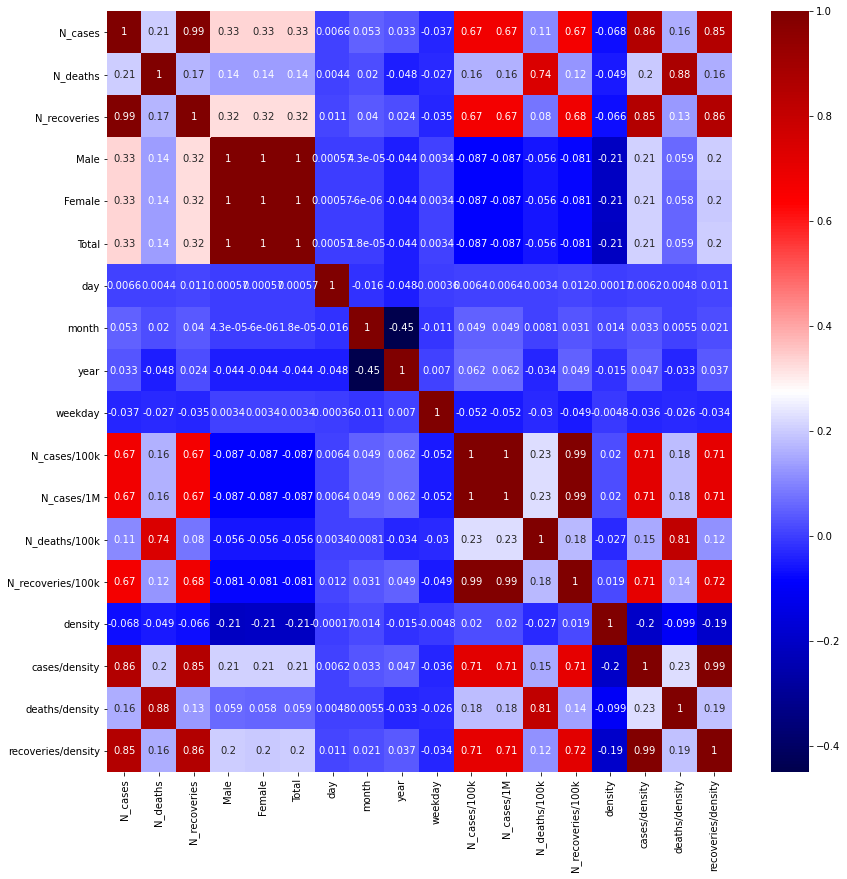

In [631]:
f=plt.figure(figsize=(14, 14))
sns.heatmap(corr1, annot=True, cmap='seismic')
plt.show()

### PAIRPLOT

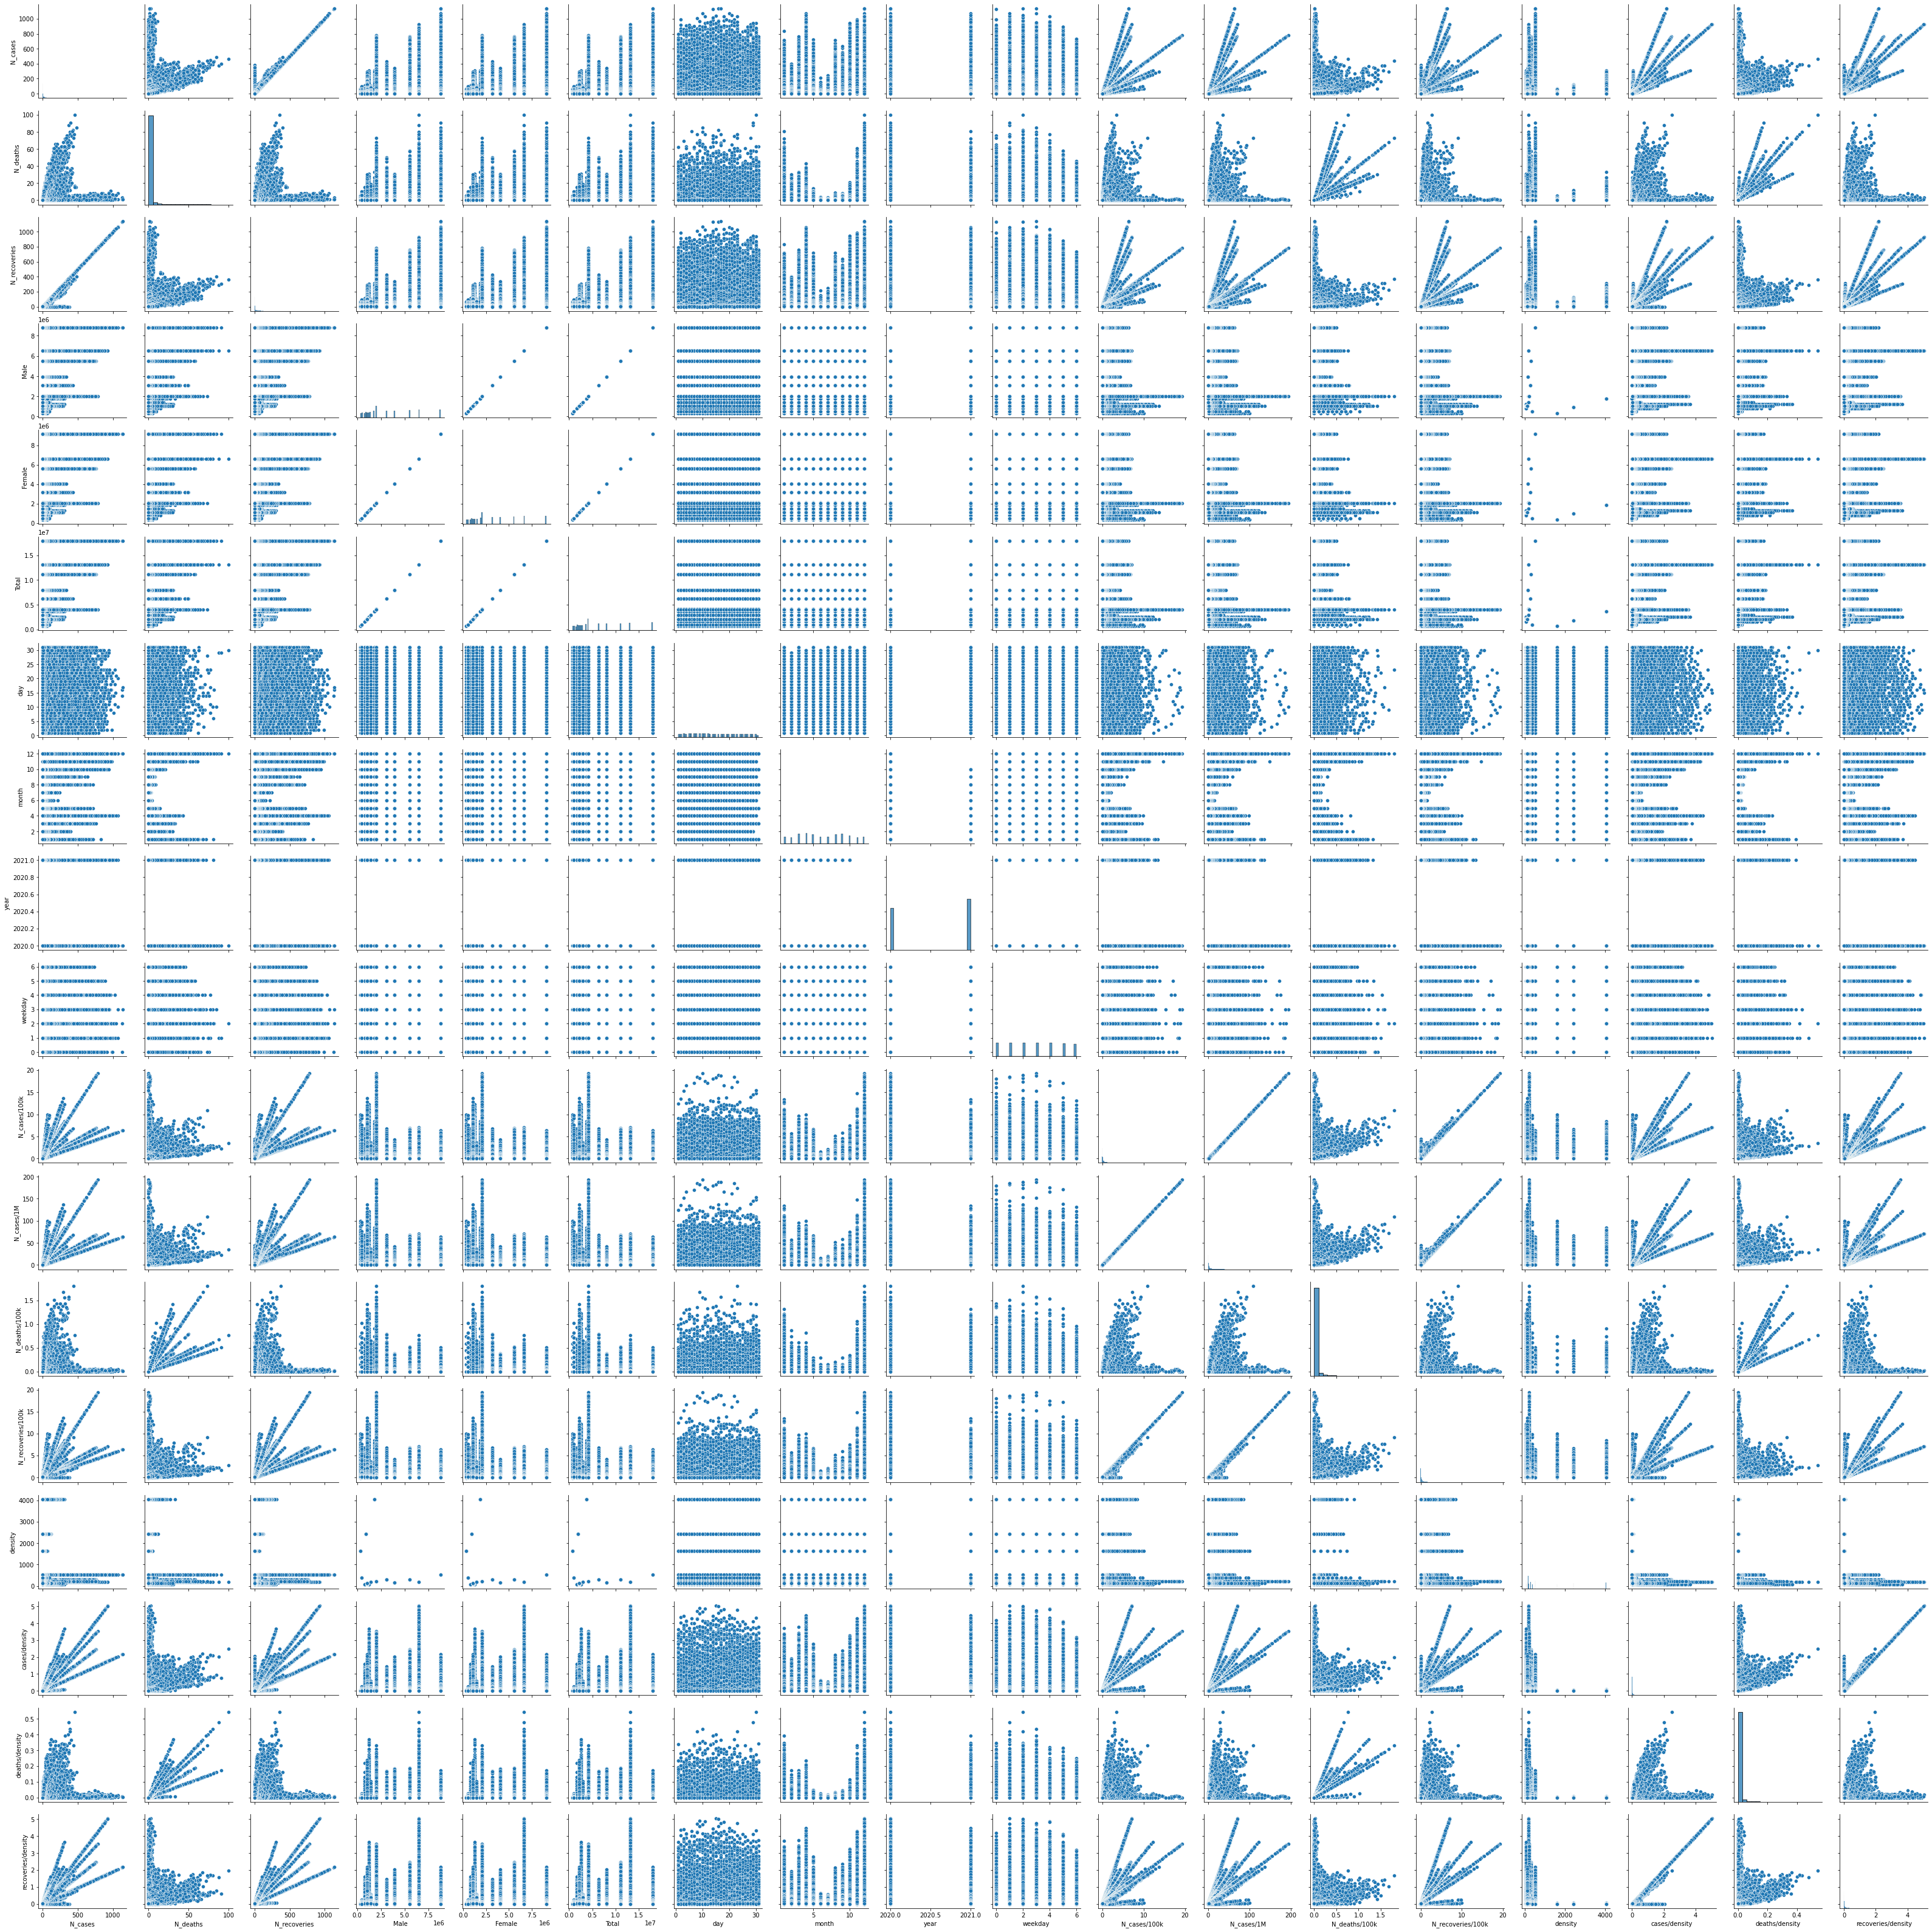

In [778]:
f=sns.pairplot(df_merged)

### 3 _Further variables to be considered_

#### 3.1  GENDER

Text(0.5, 1.0, 'Number of cases vs Number of deaths by gender')

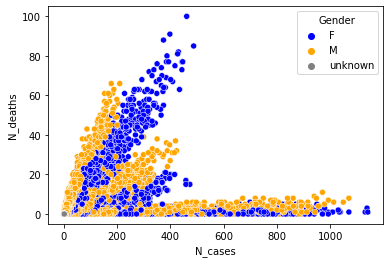

In [871]:
g=sns.scatterplot(data=df_merged, x='N_cases', y='N_deaths',hue='Gender', palette=['b', 'orange','grey'])
ax.set_title('Number of cases vs Number of deaths by gender')

In [770]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_deaths_gender.png'))

There is clear relationship between gender, number of deaths, and cases. Male people seem to be more affected than females.

#### 3.2 AGE

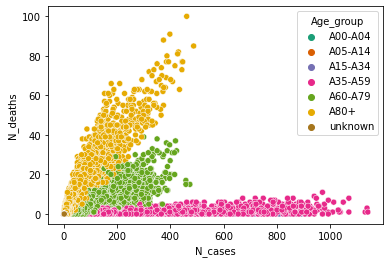

In [878]:
g=sns.scatterplot(data=df_merged, y='N_deaths', x='N_cases', hue='Age_group', palette=age_group)

In [775]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_deaths_age.png'))

There is a clear difference in the number of deaths by age group. People aged 80 or older are the most at risk of dying from COVID-19, followed by people aged 60 to 79.

Text(0.5, 1.0, 'COVID-19 effects on population aged 80 or more')

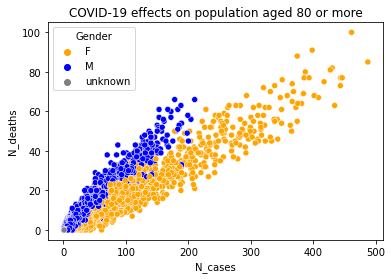

In [876]:
g=sns.scatterplot(data=df_merged, y=df_merged[df_merged['Age_group'] =='A80+']['N_deaths'], 
                  x=df_merged[df_merged['Age_group'] =='A80+']['N_cases'], hue='Gender',  palette=['orange', 'b','grey'])
g.set_title('COVID-19 effects on population aged 80 or more')

The difference in gender is clear in the number of cases and deaths in the population over 80 years old of age. Males are more at risk of diyng from COVID-19 than females.

In [862]:
g.figure.savefig(os.path.join(path, 'analysis','visualizations', 'cases_deaths_A80.png'))

Text(0.5, 1.0, 'COVID-19 effects population aged 35-59')

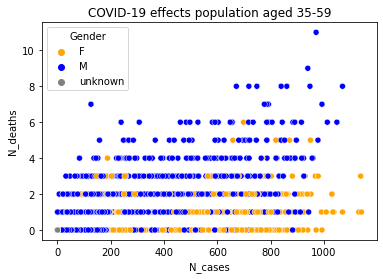

In [869]:
g=sns.scatterplot(data=df_merged, y=df_merged[df_merged['Age_group'] =='A35-A59']['N_deaths'], 
                  x=df_merged[df_merged['Age_group'] =='A35-A59']['N_cases'], hue='Gender', palette=['orange', 'b','grey'])
g.set_title('COVID-19 effects population aged 35-59')

In [970]:
df_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102850 entries, 0 to 102849
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               102850 non-null  category      
 1   Age_group           102850 non-null  category      
 2   Gender              102850 non-null  category      
 3   Date                102850 non-null  datetime64[ns]
 4   N_cases             102850 non-null  int64         
 5   N_deaths            102850 non-null  int64         
 6   N_recoveries        102850 non-null  int64         
 7   Male                102850 non-null  int64         
 8   Female              102850 non-null  int64         
 9   Total               102850 non-null  int64         
 10  day                 102850 non-null  int64         
 11  month               102850 non-null  int64         
 12  year                102850 non-null  int64         
 13  weekday             102850 no

## _REVISITING KEY QUESTIONS_

#### GEOGRAPHICAL
Different climates do play a role in the diffusion of COVID-19. The two major climatic zones, Oceanic and Continental, have different amounts of cases and deaths.
States with a __Continental Climate__ (Eastern Germany) have more COVID-19 cases and related deaths per capita with respect to States with an __Oceanic Climate__. 
Rimembering that a continental climate has colder winters than an oceanic climate, it is safe to assume that the average temperature plays a role in the diffusion of COVID-19.
THe only factor that can mask the effect of climate is the population density. States in an oceanic climatic zone, with higher population density, see higher numbers of COVID-19 per capita, but still the number of deaths are lower than the correspective Continental climate States.

#### TEMPORAL
Two seasonalities are present: one related to the years seasons, the other to the day of the week. While the latter is of little importance in this analysis, as it most possibly reflects a lower amount of data due to fewer healthcare workers collection information during the weekend, the former is important. 
Colder climates are known to favor the transoport and diffusion of SARS-COV2 and similar viruses, so it is no surprise that the winter months have much higher number of cases and deaths with respect to summer months. This pattern is present regardless of climatic zone or population density.

Regarding the lag between peaks of cases and subsequent peaks in deaths, the Exploratory Analysis did not provide enough information. A more in-depth time-series analysis is probably required to solve the issue.

## _Working Hypothesis_

__Climate, gender, and age are three factors that most impact the possibility to contract the virus. If a person is male, more than 80 years old, and lives in a State with continental climate, their have the highest risk of get sick and die of COVID-19__

In [971]:
df_merged.to_csv(os.path.join(path,'data','prepared_data','df_checked_flags.csv'))

In [974]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102850 entries, 0 to 102849
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               102850 non-null  category      
 1   Age_group           102850 non-null  category      
 2   Gender              102850 non-null  category      
 3   Date                102850 non-null  datetime64[ns]
 4   N_cases             102850 non-null  int64         
 5   N_deaths            102850 non-null  int64         
 6   N_recoveries        102850 non-null  int64         
 7   Male                102850 non-null  int64         
 8   Female              102850 non-null  int64         
 9   Total               102850 non-null  int64         
 10  day                 102850 non-null  int64         
 11  month               102850 non-null  int64         
 12  year                102850 non-null  int64         
 13  weekday             102850 no

In [973]:
df_merged['climate_flag']=df_merged['climate_flag'].astype('category')